In [78]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [79]:
# df = pd.read_excel("Topics_stars10000_project_keyword.xlsx") #star>10000개가 있는 Df
df = pd.read_excel("Topics_keywords.xlsx")   # vehicle Data가 들은 Df
df.drop_duplicates(['project_name'])
df.head(50)

,project_name,topic_keyword
0,ApolloAuto/apollo,"['apollo', 'self-driving-car', 'autonomous-dri..."
1,AtsushiSakai/PythonRobotics,"['python', 'algorithm', 'control', 'robot', 'l..."
2,microsoft/AirSim,"['simulator', 'research', 'ai', 'computer-visi..."
3,carla-simulator/carla,"['simulator', 'research', 'ai', 'computer-visi..."
4,Autoware-AI/autoware.ai,"['planner', 'detection', 'ros', 'calibration',..."
5,microsoft/AutonomousDrivingCookbook,"['microsoft', 'car', 'tutorial', 'deep-learnin..."
6,manfreddiaz/awesome-autonomous-vehicles,"['computer-vision', 'deep-learning', 'autonomo..."
7,cyberbotics/webots,"['open-source', 'multi-platform', 'simulator',..."
8,generalized-intelligence/GAAS,"['aviation', 'uav', 'drone', 'flight-controlle..."
9,daohu527/dig-into-apollo,"['tutorial', 'self-driving-car', 'cyber', 'aut..."


In [80]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
print(len(target),len(string_list))
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

for i in range(len(target)):
    print(target[i],string_list[i])

139 139
machinelearning ['machinelearning-python', 'ml', 'machine-translation', 'machine-learning-from-scratch', 'machine-learning-algorithms', 'machine-learning']
package ['packages', 'package-manager', 'packaging']
zsh ['zsh-theme', 'zsh-prompt', 'zsh-configuration', 'zsh-autosuggestions']
zerossl ['zero-copy', 'zero-configuration']
youtube ['youtube-live']
xcode ['xcode10']
x64 ['x86-64', 'x86']
wysiwyg ['wysiwyg-editor']
workflow ['workflow-automation', 'works-with-clojurescript', 'works-with-codespaces', 'works-with-construct', 'works-with-elm', 'works-with-flutter', 'works-with-gatsby', 'works-with-mint', 'works-with-phaser', 'works-with-react', 'works-with-reason', 'works-with-svelte', 'works-with-vue', 'works-with-yew']
windows ['windowing', 'windows-10', 'windows-console', 'windows-terminal', 'windowscontainers']
weixin ['weixin-plugin']
wechat ['wechat-macos', 'wechat-mini-program', 'wechat-plugin', 'wechat-weapp']
web ['webxr', 'webworkers', 'webview', 'webtorrent', 'webstor

In [81]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df['topic_keyword']):
    i_list = j.replace("[","").replace("]","").replace("'","").split(",")
    i_list = [i.strip() for i in i_list]
    df['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


[('automation', 209),
 ('self-driving-car', 46),
 ('deep-learning', 40),
 ('ros', 27),
 ('computer-vision', 24),
 ('robotics', 21),
 ('python', 18),
 ('detection', 15),
 ('machinelearning', 15),
 ('autonomous-car', 13),
 ('convolutional-neural-networks', 11),
 ('simulator', 10),
 ('neural', 10),
 ('open-source', 9),
 ('lane-detection', 9),
 ('reinforcement-learning', 9),
 ('artificial-intelligence', 8),
 ('tensorflow', 8),
 ('pytorch', 8),
 ('awesome', 8),
 ('slam', 7),
 ('carla', 7),
 ('carla-simulator', 7),
 ('simulation', 7),
 ('robot', 6),
 ('lidar', 6),
 ('cnn', 6),
 ('autonomous-navigation', 5),
 ('ai', 5),
 ('autonomous', 5),
 ('lane-finding', 5),
 ('lane-detector', 5),
 ('localization', 4),
 ('path-planning', 4),
 ('control-systems', 4),
 ('imitation-learning', 4),
 ('tutorial', 4),
 ('keras', 4),
 ('cpp', 4),
 ('lidar-point-cloud', 4),
 ('mpc', 4),
 ('segmentation', 4),
 ('kitti-dataset', 4),
 ('3d-object-detection', 4),
 ('motion-planning', 4),
 ('vision', 4),
 ('sensor-fusio

In [82]:
topic_dic_2 = {}
for i in topic_dic:
    topic_dic_2[i[0]]=i[1]
topic_list

['automation',
 'self-driving-car',
 'deep-learning',
 'ros',
 'computer-vision',
 'robotics',
 'python',
 'detection',
 'machinelearning',
 'autonomous-car',
 'convolutional-neural-networks',
 'simulator',
 'neural',
 'open-source',
 'lane-detection',
 'reinforcement-learning',
 'artificial-intelligence',
 'tensorflow',
 'pytorch',
 'awesome',
 'slam',
 'carla',
 'carla-simulator',
 'simulation',
 'robot',
 'lidar',
 'cnn',
 'autonomous-navigation',
 'ai',
 'autonomous',
 'lane-finding']

In [83]:
df['topic_keyword_str'] = [" ".join(df['topic_keyword'][i]) for i in range(len(df['topic_keyword']))]

topic_keyword_str = []
for i in range(len(df['topic_keyword'])):
    temp=[]
    for j in df['topic_keyword'][i]:
        temp.append(same_things(j))
    topic_keyword_str.append(" ".join(temp))
df['topic_keyword_str'] = topic_keyword_str
topic_keyword_str

['apollo self-driving-car automation automation automation',
 'python algorithm control robot localization robotics mapping animation path-planning slam automation automation ekf cvxpy autonomous-navigation',
 'simulator search ai computer-vision cross-platform deep-learning artificial-intelligence pixhawk self-driving-car unreal-engine drones deep-learning control-systems platform-independent autonomous-quadcoptor automation airsim',
 'simulator search ai computer-vision deep-learning cross-platform deep-learning artificial-intelligence ros self-driving-car ue4 automation automation imitation-learning unreal-engine-4 carla carla-simulator',
 'planner detection ros calibration automation 3d-map autoware autoware-developers tier-iv',
 'microsoft car tutorial deep-learning robotics simulation cntk tensorflow keras self-driving-car automation automation airsim autonomous-driving-cookbook microsoft-garage',
 'computer-vision deep-learning automation autonomous-cars car-driving',
 'open-sou

In [84]:
vectorize = TfidfVectorizer(
#     tokenizer=tokenizer, 
    min_df=5    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시하기로 했다
                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
X = vectorize.fit_transform(df['topic_keyword_str'])
print('fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

X.toarray()

fit_transform, (sentence 150, feature 62)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.35019901, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33503046, 0.        , ..., 0.        , 0.        ,
        0.2101103 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.52310978],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.27625352]])

In [85]:
tfidf_vector_df = pd.DataFrame(X.toarray(), columns=features,index=df['project_name'])
tfidf_vector_df

,3d,ai,algorithm,artificial,attention,automation,autonomous,awesome,car,carla,...,slam,source,state,systems,tensorflow,tracking,traffic,trajectory,udacity,vision
project_name,,,,,,,,,,,,,,,,,,,,,
ApolloAuto/apollo,0.000000,0.000000,0.000000,0.000000,0.0,0.652162,0.000000,0.0,0.418022,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
AtsushiSakai/PythonRobotics,0.000000,0.000000,0.350199,0.000000,0.0,0.165754,0.228673,0.0,0.000000,0.000000,...,0.316595,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
microsoft/AirSim,0.000000,0.335030,0.000000,0.302882,0.0,0.079287,0.218768,0.0,0.152465,0.000000,...,0.000000,0.0,0.0,0.302882,0.0,0.0,0.0,0.0,0.0,0.210110
carla-simulator/carla,0.000000,0.275351,0.000000,0.248930,0.0,0.130328,0.000000,0.0,0.125306,0.460366,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.172683
Autoware-AI/autoware.ai,0.699276,0.000000,0.000000,0.000000,0.0,0.183054,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mohamedameen93/Lane-lines-detection-using-Python-and-OpenCV,0.000000,0.000000,0.000000,0.000000,0.0,0.201265,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.266674
JerryIshihara/lyft-motion-prediction-for-autonomous-vehicle,0.000000,0.000000,0.000000,0.000000,0.0,0.173860,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
thayerAlshaabi/DeepEye,0.000000,0.000000,0.000000,0.000000,0.0,0.197401,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.523110


In [9]:
tfidf_vector_df.to_excel("TF-IDF_Vector.xlsx",index=False)

In [86]:
# 차원축소를 하지 않고도 PCA를 돌려봐보기

# 정보량이 95% 인 만큼의 칼럼수가 134임
pca = PCA(n_components=40)
df_pca = pca.fit_transform(tfidf_vector_df)
df_pca = pd.DataFrame(df_pca, index=tfidf_vector_df.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40
project_name,,,,,,,,,,,,,,,,,,,,,
ApolloAuto/apollo,0.408500,0.482924,-0.237261,0.272760,-0.038175,-0.120320,-0.035165,0.018771,-0.016016,-0.041346,...,0.029684,-0.037746,-0.006401,0.026839,0.028305,-0.068502,0.005411,-0.026587,-0.022432,0.023114
AtsushiSakai/PythonRobotics,-0.281430,0.061673,0.101914,-0.338181,-0.279351,-0.136375,0.077356,-0.163262,0.209562,-0.050861,...,-0.085538,-0.237693,0.091158,0.229668,-0.071752,-0.051361,0.024429,0.051993,-0.097100,-0.005560
microsoft/AirSim,0.311674,-0.214471,0.297050,-0.113179,0.025537,0.012398,0.084278,-0.042978,0.044752,0.053801,...,0.052995,0.115915,-0.036517,0.215575,0.179726,-0.110943,-0.032243,0.057665,-0.022285,0.052934
carla-simulator/carla,0.269949,-0.167387,0.341434,0.007336,0.221871,0.274687,-0.143415,-0.074770,-0.133973,-0.019523,...,0.057716,-0.043639,0.001923,0.079729,0.113183,-0.030970,0.026735,0.031841,0.058140,0.027120
Autoware-AI/autoware.ai,-0.369966,-0.063857,-0.257045,0.036441,0.436927,0.134997,-0.102935,0.129327,-0.031087,0.193544,...,0.213937,-0.017853,-0.096028,-0.000501,-0.154045,0.075876,0.065918,0.045932,-0.109224,-0.089610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mohamedameen93/Lane-lines-detection-using-Python-and-OpenCV,-0.128062,-0.409351,-0.254482,0.057946,0.142179,-0.442140,-0.176503,-0.140456,-0.134845,-0.025008,...,0.076763,0.008870,-0.049003,0.030100,-0.009903,0.052437,-0.013694,0.072279,0.024834,-0.039021
JerryIshihara/lyft-motion-prediction-for-autonomous-vehicle,-0.121512,-0.067205,-0.011800,0.026735,-0.201791,0.146747,-0.125307,-0.211197,0.308920,0.270362,...,-0.022419,0.041403,-0.175590,-0.148003,-0.066286,0.052079,-0.137483,-0.123080,0.103012,0.179639
thayerAlshaabi/DeepEye,0.171431,-0.405561,0.431543,0.196890,-0.030534,-0.214439,0.076572,0.126099,-0.164429,0.377861,...,-0.022045,-0.063169,0.005464,0.006761,-0.033889,0.074311,-0.037594,-0.057087,0.040358,-0.005975


In [87]:
# TF-IDF Vector의 모양
df_pca.shape

(150, 40)

In [88]:
np.array(df_pca)[:,0]

array([ 0.4085    , -0.28142987,  0.3116738 ,  0.26994926, -0.36996618,
        0.345677  ,  0.32286848, -0.24885665, -0.09795497,  0.55877792,
       -0.25180974, -0.32420034,  0.00359911, -0.04363581, -0.47417213,
       -0.52012984, -0.17764258,  0.01164097,  0.09307527,  0.49372686,
       -0.25820148, -0.14939981, -0.34615958,  0.50446379,  0.24113237,
       -0.17688829,  0.41691201,  0.13777978,  0.09815244, -0.03856069,
        0.05102004,  0.04004987,  0.46273218, -0.20594132,  0.12175649,
        0.4085    , -0.15973542, -0.08430745,  0.10696094,  0.03973371,
        0.04519943,  0.1255331 ,  0.38661151, -0.04495064, -0.19482743,
        0.26873629,  0.18831176, -0.10990663, -0.17826115,  0.04609396,
        0.02172725, -0.41325642, -0.07783194,  0.48956094, -0.11673262,
        0.22961825, -0.20594132,  0.32560495, -0.08028351,  0.49070781,
       -0.09558778, -0.32074257, -0.11965971, -0.11612752,  0.16690018,
       -0.20594132,  0.03093718, -0.25300629, -0.26117126, -0.23

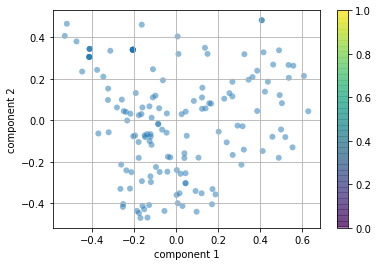

In [89]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1],
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [90]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
pca.explained_variance_ratio_.sum()

0.951909897224794

In [91]:
# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(tfidf_vector_df)

# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
pca_temp.n_components_

40

In [92]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.077583,0.091101,0.091101
pca2,0.064974,0.076296,0.167397
pca3,0.048957,0.057488,0.224885
pca4,0.044176,0.051874,0.276759
pca5,0.041187,0.048364,0.325123
pca6,0.038706,0.045451,0.370574
pca7,0.035390,0.041557,0.412131
pca8,0.034234,0.040199,0.452330
pca9,0.029561,0.034713,0.487043
pca10,0.027623,0.032436,0.519478


In [93]:
# Instantiate the clustering model 
# n_init : 랜덤한 초기값을 몇번이나 다르게 설정해서 돌릴건지
# max_iter=300 : iteration을 반복적으로 수행하면 서 좋을 결과로 수렴하게되는데 그 횟수를 몇번 할 것인지
# verbose : 계산과정 보여줌 0,1,2 이렇게 해서 보여주는 정보의 양을 조절 할 수있음

# 15개의 클러스터를 만들기 
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

KMeans(n_clusters=10)

In [94]:
# 모델에 fitting 하기
kmeans.fit(df_pca)

KMeans(n_clusters=10)

In [95]:
y_kmeans = kmeans.predict(df_pca)
y_kmeans[0:10] # 군집화 된 결과

array([2, 0, 6, 7, 5, 2, 1, 0, 1, 2], dtype=int32)

In [96]:
# 군집의 중심
kmeans.cluster_centers_

array([[-3.65709123e-01,  2.37551612e-01,  2.32053221e-01,
        -2.13841874e-01, -8.10516916e-02, -9.42991537e-02,
        -1.64905659e-01,  1.33054928e-01, -1.27551391e-02,
        -8.58188334e-02,  2.33821126e-02,  3.06944435e-02,
        -1.49846255e-02, -1.89694253e-02, -3.96496216e-02,
        -1.83962153e-03,  3.80388698e-03, -4.16577487e-03,
         4.91158348e-02, -6.90176090e-03, -1.88886286e-03,
        -5.17927990e-03, -2.49187266e-02,  1.03856004e-02,
        -2.15091184e-03,  4.41656356e-03, -1.64270655e-02,
        -2.54324371e-03,  1.04204140e-02,  3.68955049e-03,
         3.00851226e-03,  2.40170867e-03,  5.97356787e-04,
         1.59980811e-02, -9.78338013e-03, -3.35161748e-03,
        -1.11553404e-02, -3.58882043e-03, -5.76433709e-03,
        -4.70231867e-03],
       [-3.96111092e-02,  1.28227634e-01, -3.32826675e-03,
        -1.49248595e-01,  4.50277928e-03, -1.37418119e-01,
         3.46098632e-01, -7.02492124e-03,  1.95109920e-01,
        -1.49059713e-02, -6.76

In [97]:
kmeans.labels_[0:8]

array([2, 0, 6, 7, 5, 2, 1, 0], dtype=int32)

In [98]:
y_kmeans[:5]

array([2, 0, 6, 7, 5], dtype=int32)

In [99]:
# 클러스터링의 성능측정
# 값이 높을 수록 좋음
kmeans.inertia_

75.52869734756844

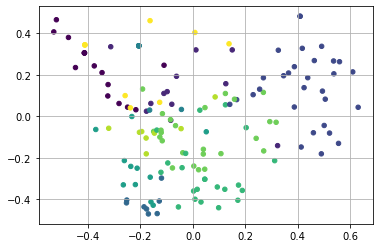

In [100]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
# plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()

In [101]:
np.array(df_pca)

array([[ 0.4085    ,  0.48292394, -0.23726139, ..., -0.02658722,
        -0.02243211,  0.02311421],
       [-0.28142987,  0.06167339,  0.10191387, ...,  0.05199346,
        -0.09710028, -0.00555955],
       [ 0.3116738 , -0.2144713 ,  0.29705024, ...,  0.05766481,
        -0.02228547,  0.05293445],
       ...,
       [ 0.171431  , -0.40556077,  0.43154326, ..., -0.05708744,
         0.04035782, -0.00597472],
       [ 0.14999946,  0.32041231, -0.07978045, ...,  0.00130819,
        -0.04651682,  0.00112268],
       [-0.17650492, -0.4477416 , -0.30977604, ...,  0.0357708 ,
         0.03525719, -0.01447164]])

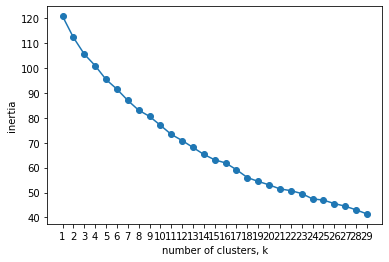

In [102]:
ks = range(1,30)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [103]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df['project_name'][idx]]
    else:
        clustered_dic[i].append(df['project_name'][idx])
clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic

[(0,
  ['AtsushiSakai/PythonRobotics',
   'cyberbotics/webots',
   'pptacher/probabilistic_robotics',
   'linorobot/linorobot',
   'AutoRally/autorally',
   'AtsushiSakai/MATLABRobotics',
   'erdos-project/erdos',
   'IeiuniumLux/AAV',
   'SMARTlab-Purdue/ros-tutorial-gazebo-simulation',
   'linorobot/ros_dwm1000',
   'keenan-burnett/yeti_radar_odometry',
   'sunsided/bht-ams-playerstage',
   'uf-mil/SubjuGator',
   'uf-mil/NaviGator',
   'srmauvsoftware/URSim',
   'OpenTransat/OpenTransat-Navigator']),
 (1,
  ['manfreddiaz/awesome-autonomous-vehicles',
   'generalized-intelligence/GAAS',
   'tier4/AutowareArchitectureProposal.proj',
   'karanchawla/GPS_IMU_Kalman_Filter',
   'datlife/jetson-car',
   'Habrador/Self-driving-vehicle',
   'mmajewsk/Tonic',
   'erikliland/pyMHT',
   'RuPingCen/mick_robot',
   'SJSU-AD/FusionAD',
   'aljosaosep/sparse-scene-flow',
   'jmscslgroup/catvehicle']),
 (2,
  ['ApolloAuto/apollo',
   'microsoft/AutonomousDrivingCookbook',
   'daohu527/dig-into-apol

In [104]:
df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num

In [105]:
# 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?

topic_clustered_list = []
for i in df_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_clustered_list.append(temp_dic[:15])
topic_clustered_list

[[('automation', 20),
  ('robotics', 15),
  ('ros', 8),
  ('robot', 6),
  ('slam', 3),
  ('simulation', 3),
  ('python', 2),
  ('localization', 2),
  ('autonomous-navigation', 2),
  ('open-source', 2),
  ('simulator', 2),
  ('robots', 2),
  ('cpp', 2),
  ('matlab', 2),
  ('auvsi', 2)],
 [('automation', 19),
  ('autonomous-car', 7),
  ('autonomous', 4),
  ('autonomous-cars', 3),
  ('ros', 3),
  ('deep-learning', 2),
  ('self-driving-car', 2),
  ('autonomous-navigation', 2),
  ('robotics', 2),
  ('computer-vision', 1),
  ('car-driving', 1),
  ('aviation', 1),
  ('uav', 1),
  ('drone', 1),
  ('flight-controller', 1)],
 [('automation', 40),
  ('self-driving-car', 28),
  ('deep-learning', 8),
  ('awesome', 7),
  ('computer-vision', 5),
  ('machinelearning', 5),
  ('tutorial', 3),
  ('reinforcement-learning', 3),
  ('python', 3),
  ('software', 3),
  ('apollo', 2),
  ('robotics', 2),
  ('simulation', 2),
  ('neural', 2),
  ('vehicle', 2)],
 [('automation', 14),
  ('lane-detection', 7),
  ('l

In [106]:
df_cluster['top_15_topics'] = topic_clustered_list
df_cluster

,num,clusters,cluster_num,top_15_topics
0,0,"[AtsushiSakai/PythonRobotics, cyberbotics/webo...",16,"[(automation, 20), (robotics, 15), (ros, 8), (..."
1,1,"[manfreddiaz/awesome-autonomous-vehicles, gene...",12,"[(automation, 19), (autonomous-car, 7), (auton..."
2,2,"[ApolloAuto/apollo, microsoft/AutonomousDrivin...",30,"[(automation, 40), (self-driving-car, 28), (de..."
3,3,"[cfzd/Ultra-Fast-Lane-Detection, fabvio/ld-lsi...",8,"[(automation, 14), (lane-detection, 7), (lane-..."
4,4,"[h1st-ai/h1st, intel/ad-rss-lib, Flycars/OpenH...",9,"[(automation, 13), (data, 1), (time-series, 1)..."
5,5,"[Autoware-AI/autoware.ai, maudzung/RTM3D, jhul...",11,"[(automation, 14), (detection, 11), (pytorch, ..."
6,6,"[microsoft/AirSim, AndreiBarsan/DynSLAM, dctia...",22,"[(automation, 30), (deep-learning, 16), (compu..."
7,7,"[carla-simulator/carla, jiachenli94/Awesome-In...",25,"[(automation, 35), (deep-learning, 10), (self-..."
8,8,"[BichenWuUCB/SqueezeSeg, enginBozkurt/LidarObs...",8,"[(automation, 11), (lidar-point-cloud, 4), (li..."
9,9,"[ArduPilot/apm_planner, usdot-fhwa-stol/carma-...",9,"[(automation, 13), (ros, 9), (open-source, 2),..."


In [ ]:
df_cluster.to_excel("packages_TF-IDF_kmeans_clusters.xlsx",index=False)

# DBSCAN Clustering

In [69]:
# dbscan = DBSCAN(eps = 0.5, min_samples=5)
dbscan = DBSCAN(eps = 6)
dbscan_cluster = dbscan.fit_predict(scaled_df)
dbscan_cluster

array([ 0, -1,  0,  0, -1,  0,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0,  2,
        0, -1,  1, -1, -1, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0,  1,  0,
       -1,  0,  2, -1, -1, -1, -1, -1, -1,  2, -1,  0,  0, -1, -1, -1, -1,
        0, -1,  0, -1, -1,  0, -1, -1,  0, -1, -1,  0, -1, -1,  0, -1,  0,
       -1,  0, -1,  0,  0,  2,  1, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0,
       -1,  0,  0, -1, -1, -1,  0, -1,  0,  0, -1,  0, -1,  0, -1,  0, -1,
       -1,  0,  0, -1,  0,  0, -1, -1, -1,  0, -1, -1,  0, -1,  0,  0,  2,
       -1,  0,  0, -1, -1,  0, -1,  0, -1,  0, -1, -1,  0,  0,  0, -1, -1,
        0,  0, -1, -1, -1,  0,  1,  0, -1,  0, -1,  0,  0,  0])

In [70]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

dbscan_clustered_dic = {}
dbscan_clustered_list = []
dbscan_cluster_num = len(set(dbscan_cluster))
for idx,i in enumerate(dbscan_cluster):
    if i not in dbscan_clustered_dic:
        dbscan_clustered_dic[i] = [df['project_name'][idx]]
    else:
        dbscan_clustered_dic[i].append(df['project_name'][idx])
dbscan_clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])
dbscan_clustered_dic

[(-1,
  ['AtsushiSakai/PythonRobotics',
   'Autoware-AI/autoware.ai',
   'cyberbotics/webots',
   'generalized-intelligence/GAAS',
   'pptacher/probabilistic_robotics',
   'jiachenli94/Awesome-Interaction-aware-Trajectory-Prediction',
   'h1st-ai/h1st',
   'AndreiBarsan/DynSLAM',
   'ArduPilot/apm_planner',
   'zhm-real/MotionPlanning',
   'AtsushiSakai/MATLABRobotics',
   'Amin-Tgz/awesome-CARLA',
   'karanchawla/GPS_IMU_Kalman_Filter',
   'usdot-fhwa-stol/carma-platform',
   'dctian/DeepPiCar',
   'StanfordASL/Trajectron-plus-plus',
   'maudzung/RTM3D',
   'ika-rwth-aachen/Cam2BEV',
   'datlife/jetson-car',
   'sigmaai/self-driving-golf-cart',
   'erdos-project/pylot',
   'dotchen/LearningByCheating',
   'Habrador/Self-driving-vehicle',
   'abhisheknaik96/MultiAgentTORCS',
   'weisongwen/UrbanLoco',
   'erdos-project/erdos',
   'HViktorTsoi/ACSC',
   'BeamNG/BeamNGpy',
   'jiachenli94/Awesome-Decision-Making-Reinforcement-Learning',
   'dineshresearch/Novel-Deep-Learning-Model-for-Tr

In [71]:
df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
df_dbscan_cluster['cluster_num'] = dbscan_cluster_num

In [72]:
topic_dbscan_clustered_list = []
for i in df_dbscan_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_dbscan_clustered_list.append(temp_dic[:15])
topic_dbscan_clustered_list

[[('automation', 109),
  ('deep-learning', 21),
  ('self-driving-car', 18),
  ('python', 14),
  ('ros', 12),
  ('computer-vision', 12),
  ('detection', 11),
  ('robotics', 10),
  ('machinelearning', 10),
  ('open-source', 9),
  ('convolutional-neural-networks', 8),
  ('tensorflow', 7),
  ('robot', 6),
  ('slam', 6),
  ('simulator', 6)],
 [('automation', 86),
  ('self-driving-car', 21),
  ('deep-learning', 18),
  ('ros', 15),
  ('robotics', 11),
  ('computer-vision', 10),
  ('autonomous-car', 10),
  ('lane-detection', 8),
  ('lane-finding', 5),
  ('lane-detector', 5),
  ('reinforcement-learning', 5),
  ('machinelearning', 5),
  ('simulator', 4),
  ('cnn', 4),
  ('python', 4)],
 [('awesome', 7),
  ('automation', 6),
  ('self-driving-car', 5),
  ('computer-vision', 2),
  ('tutorial', 1),
  ('data', 1),
  ('car-driving', 1),
  ('intelligent-vehicle', 1),
  ('nlp', 1),
  ('reinforcement-learning', 1),
  ('deep-learning', 1),
  ('gan', 1),
  ('mechine-learing', 1),
  ('slam', 1)],
 [('automa

In [73]:
df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
df_dbscan_cluster

,num,clusters,cluster_num,top_15_topics
0,-1,"[AtsushiSakai/PythonRobotics, Autoware-AI/auto...",78,"[(automation, 109), (deep-learning, 21), (self..."
1,0,"[ApolloAuto/apollo, microsoft/AirSim, carla-si...",62,"[(automation, 86), (self-driving-car, 21), (de..."
2,1,"[DeepTecher/awesome-autonomous-vehicle, daohu5...",5,"[(awesome, 7), (automation, 6), (self-driving-..."
3,2,"[BichenWuUCB/SqueezeSeg, jhultman/vision3d, en...",5,"[(automation, 8), (lidar-point-cloud, 4), (det..."


In [67]:
# df_cluster

In [68]:
# 다중 클러스터링을 해야할 패키지들
target_topics = df_cluster.sort_values(by=['cluster_num'],ascending=False).iloc[0]['clusters']
target_topics

NameError: name 'df_cluster' is not defined

# 2번째 다중 클러스터링

In [ ]:
# 다중클러스터링대상인 프로젝트들의 벡터들
df_clus_2 =  df[df['project_name'].isin(target_topics)]
df_clus_2


In [ ]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df_clus_2['topic_keyword']):
    i_list = j
    i_list = [i.strip() for i in i_list]
    df_clus_2['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


topic_dic_2 = {}
for i in topic_dic:
    topic_dic_2[i[0]]=i[1]
topic_list




df['topic_keyword_str'] = [" ".join(df['topic_keyword'][i]) for i in range(len(df['topic_keyword']))]

topic_keyword_str = []
for i in range(len(df['topic_keyword'])):
    temp=[]
    for j in df['topic_keyword'][i]:
        temp.append(same_things(j))
    topic_keyword_str.append(" ".join(temp))
df['topic_keyword_str'] = topic_keyword_str
topic_keyword_str

In [ ]:
vectorize = TfidfVectorizer(
#     tokenizer=tokenizer, 
    min_df=5    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시하기로 했다
                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
X = vectorize.fit_transform(df_clus_2['topic_keyword_str'])
print('fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

X.toarray()

In [ ]:
tfidf_vector_df = pd.DataFrame(X.toarray(), columns=features,index=df_clus_2['project_name'])
tfidf_vector_df

In [ ]:
pca = PCA(n_components=96)
df_pca = pca.fit_transform(tfidf_vector_df)
df_pca = pd.DataFrame(df_pca, index=tfidf_vector_df.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

In [ ]:
# countVector의 모양
print(df_pca.shape)

# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
print(pca.explained_variance_ratio_.sum())

# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(tfidf_vector_df)

# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
print(pca_temp.n_components_)

In [ ]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

In [ ]:
# Instantiate the clustering model 
# n_init : 랜덤한 초기값을 몇번이나 다르게 설정해서 돌릴건지
# max_iter=300 : iteration을 반복적으로 수행하면 서 좋을 결과로 수렴하게되는데 그 횟수를 몇번 할 것인지
# verbose : 계산과정 보여줌 0,1,2 이렇게 해서 보여주는 정보의 양을 조절 할 수있음

# 15개의 클러스터를 만들기 
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

# 모델에 fitting 하기
kmeans.fit(df_pca)

y_kmeans = kmeans.predict(df_pca)
y_kmeans[0:10] # 군집화 된 결과


In [ ]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()

In [ ]:
ks = range(1,30)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [ ]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df['project_name'][idx]]
    else:
        clustered_dic[i].append(df['project_name'][idx])
clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic

df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num

# 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?

topic_clustered_list = []
for i in df_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_clustered_list.append(temp_dic[:15])
topic_clustered_list

In [ ]:
df_cluster['top_15_topics'] = topic_clustered_list
df_cluster

In [ ]:
# 다중 클러스터링을 해야할 패키지들
target_topics = df_cluster.sort_values(by=['cluster_num'],ascending=False).iloc[0]['clusters']
target_topics

# 3번째 다중 클러스터링

In [ ]:
# 다중클러스터링대상인 프로젝트들의 벡터들
df_clus_3 =  df[df['project_name'].isin(target_topics)]
df_clus_3


In [ ]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df_clus_3['topic_keyword']):
    i_list = j
    i_list = [i.strip() for i in i_list]
    df_clus_3['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


topic_dic_2 = {}
for i in topic_dic:
    topic_dic_2[i[0]]=i[1]
topic_list




df['topic_keyword_str'] = [" ".join(df['topic_keyword'][i]) for i in range(len(df['topic_keyword']))]

topic_keyword_str = []
for i in range(len(df['topic_keyword'])):
    temp=[]
    for j in df['topic_keyword'][i]:
        temp.append(same_things(j))
    topic_keyword_str.append(" ".join(temp))
df['topic_keyword_str'] = topic_keyword_str
topic_keyword_str

In [ ]:
vectorize = TfidfVectorizer(
#     tokenizer=tokenizer, 
    min_df=5    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시하기로 했다
                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
X = vectorize.fit_transform(df_clus_3['topic_keyword_str'])
print('fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

X.toarray()

In [ ]:
tfidf_vector_df = pd.DataFrame(X.toarray(), columns=features,index=df_clus_3['project_name'])
tfidf_vector_df

In [ ]:
pca = PCA(n_components=106)
df_pca = pca.fit_transform(tfidf_vector_df)
df_pca = pd.DataFrame(df_pca, index=tfidf_vector_df.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

In [ ]:
# countVector의 모양
print(df_pca.shape)

# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
print(pca.explained_variance_ratio_.sum())

# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(tfidf_vector_df)

# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
print(pca_temp.n_components_)

In [ ]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

In [ ]:
# Instantiate the clustering model 
# n_init : 랜덤한 초기값을 몇번이나 다르게 설정해서 돌릴건지
# max_iter=300 : iteration을 반복적으로 수행하면 서 좋을 결과로 수렴하게되는데 그 횟수를 몇번 할 것인지
# verbose : 계산과정 보여줌 0,1,2 이렇게 해서 보여주는 정보의 양을 조절 할 수있음

# 15개의 클러스터를 만들기 
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

# 모델에 fitting 하기
kmeans.fit(df_pca)

y_kmeans = kmeans.predict(df_pca)
y_kmeans[0:10] # 군집화 된 결과


In [ ]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()

In [ ]:
ks = range(1,30)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [ ]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df['project_name'][idx]]
    else:
        clustered_dic[i].append(df['project_name'][idx])
clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic

df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num

# 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?

topic_clustered_list = []
for i in df_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_clustered_list.append(temp_dic[:15])
topic_clustered_list

In [ ]:
df_cluster['top_15_topics'] = topic_clustered_list
df_cluster

In [ ]:
df_cluster.to_excel("3번째클러스터.xlsx",index=False)